In [1]:
# MODULE 5 ASSI - LINEAR REGRESION 

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
#plt.style.use('dark_background')

In [5]:
data = pd.read_csv('td2.csv')
data.head()

,sale_price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,waterfront_view_Yes,zipcode_group_zipcode_group_1,zipcode_group_zipcode_group_2,zipcode_group_zipcode_group_3,zipcode_group_zipcode_group_4,zipcode_group_zipcode_group_5,zipcode_group_zipcode_group_6,zipcode_group_zipcode_group_7,zipcode_group_zipcode_group_8,zipcode_group_zipcode_group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,NaN,7,1180.0,0,...,False,False,False,False,False,False,False,False,False,False
1,538000.0,3,2.25,2570.0,7242.0,2.0,NaN,7,2170.0,400,...,False,False,True,False,False,False,False,False,False,False
2,180000.0,2,1.00,770.0,10000.0,1.0,NaN,6,770.0,0,...,False,False,True,False,False,False,False,False,False,False
3,604000.0,4,3.00,1960.0,5000.0,1.0,NaN,7,1050.0,910,...,False,False,False,True,False,False,False,False,False,False
4,510000.0,3,2.00,1680.0,8080.0,1.0,NaN,8,1680.0,0,...,False,False,False,False,True,False,False,False,False,False


### 1. To create "floor_mean" column

In [6]:
data['mean_sales'] = data['sale_price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

In [7]:
## To check the unique values in column "No of Floors"
unique_floors = data['No of Floors'].unique()
print(unique_floors)


[1.  2.  1.5 3.  2.5 3.5]


In [9]:
## Using pandas.pivot_table() to calculate the "floor_mean"
floor_mean= data.pivot_table( values = 'sale_price', columns='No of Floors', aggfunc=np.mean)
floor_mean

No of Floors,1.0,1.5,2.0,2.5,3.0,3.5
sale_price,431826.297032,542188.988482,599260.70846,798774.47205,551141.645425,662634.375


In [10]:
# making new column
data['floor_mean'] = 0

# for every unique floor_mean, fill its mean price in new column "floor_mean"
for i in floor_mean.columns:
  ### start code ###
  data['floor_mean'][data['No of Floors']==i] = floor_mean[i][0]
  ### end code ###

data['floor_mean'].head()

0    431826.297032
1    599260.708460
2    431826.297032
3    431826.297032
4    431826.297032
Name: floor_mean, dtype: float64

### 2. To Compare Residual plots

In [13]:
## Calculating residuals floor_mean_difference and mean_difference
### start code###
mean_difference = data['mean_sales'] - data['sale_price']
floor_mean_difference = data['floor_mean'] - data['sale_price']

### end code ###
mean_difference.size, floor_mean_difference.size

(21609, 21609)

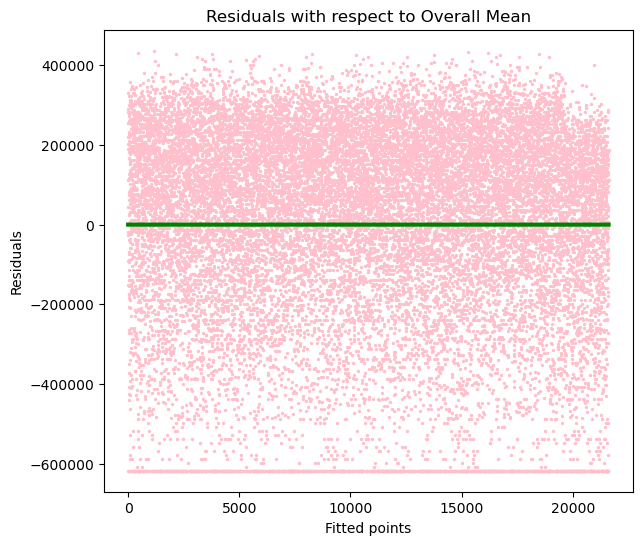

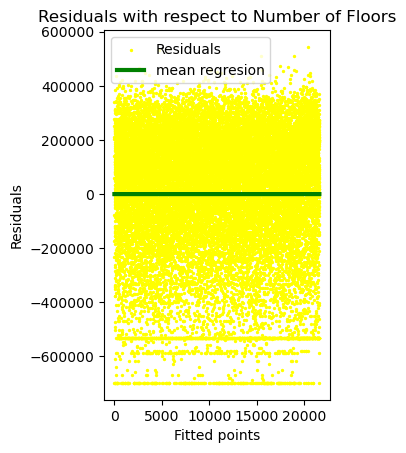

In [17]:
## Plotting the Residuals for comparison

k = range(0, len(data)) # for x axis
l = [0 for i in range(len(data))] # for regression line in residual plot

plt.figure( figsize = (15,6), dpi =100)

################## plot for Overall Mean ####################
plt.subplot(1,2,1)
#code to create the residual of mean regression model along with regression line
### start code ###
plt.scatter(k, mean_difference, color= 'pink', label= 'Residuals', s=2 )
plt.plot(k,l, color= "green", label= 'mean regresion', linewidth=3)

### end code ###
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title('Residuals with respect to Overall Mean')
plt.show()

################## plot for Overall Mean ####################
plt.subplot(1,2,2)
#code to create the residual of floor mean regression model along with regression line
### start code ###
plt.scatter(k, floor_mean_difference, color= 'yellow', label= 'Residuals', s=2 )
plt.plot(k, l, color= "green", label= 'mean regresion', linewidth=3)
### end code ###
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title("Residuals with respect to Number of Floors")

plt.legend()

In [21]:
from sklearn.metrics import mean_squared_error
y = data['sale_price']
y1 = data['mean_sales']
y2 = data['floor_mean']
n = len(data)
## Calculate mean square error for overall mean regression model and call it MSE 1
### start code ###
MSE1 = sum(abs(y1-y))/n
MSE1
### end code ###

## Calculate mean square error for floor mean regression model and call it MSE 2
### start code ###
MSE2 =sum(abs(y2-y))/n
MSE2
### end code ###

## calculate R-Square value using the formula and call it R2

### start code ###
y = data['sale_price']
y_bar = data['mean_sales']
y_hat = data['floor_mean']
n=len(data)

mse_mean = mean_squared_error(y_bar,y)
mse_model = mean_squared_error(y_hat,y)

R2 =1 - (mse_model / mse_mean)
### end code ###
R2

0.10914638255441778